In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
print(list(iris.keys()))


['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
print(iris.feature_names)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
import pandas as pd
df=pd.DataFrame(iris.data)
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
x_data=iris.data #Independent variable 
labels=iris.target # Dependent variable 
print(x_data.shape)
print(labels.shape)

(150, 4)
(150,)


In [9]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.2, random_state=5)

In [11]:
from sklearn.preprocessing import StandardScaler 
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', multi_class='ovr', random_state=5)
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', random_state=5, solver='newton-cg')

In [13]:
print('Logistic Regression Model Coeff (m) =' , model.coef_)
print('Logistic Regression Model Intercept (b) =' , model.intercept_)

Logistic Regression Model Coeff (m) = [[-1.04408281  1.20129506 -1.65708813 -1.53566376]
 [ 0.51271665 -1.46047945  0.62242263 -1.08792398]
 [-0.06236953 -0.29365697  2.15566282  3.08871204]]
Logistic Regression Model Intercept (b) = [-2.14713253 -1.00899958 -3.52089175]


In [14]:
y_pred=model.predict(X_test)
print(y_pred)

[1 1 2 0 2 1 0 2 0 2 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]


In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8666666666666667


In [16]:
print("\nPrediction : ",model.predict(X_test))
print("\nScore : ",model.score(X_test, y_test))


Prediction :  [1 1 2 0 2 1 0 2 0 2 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]

Score :  0.8666666666666667


In [17]:
y_test

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [18]:
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(X_test)))


Confusion Matrix : 
 [[8 0 0]
 [0 9 2]
 [0 2 9]]


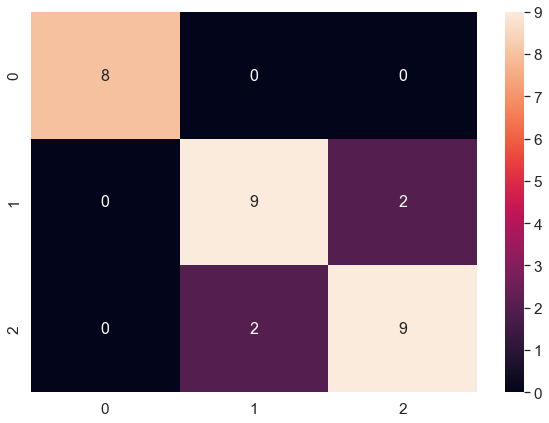

In [19]:
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))
df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.82      0.82        11
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



Logistic Regression Model Coeff (m) = [[-1.04408281  1.20129506 -1.65708813 -1.53566376]]
Logistic Regression Model Coeff (m) = [[ 0.51271665 -1.46047945  0.62242263 -1.08792398]]
Logistic Regression Model Coeff (m) = [[-0.06236953 -0.29365697  2.15566282  3.08871204]]

Logistic Regression Model Coeff (m) = [-2.14713253]
Logistic Regression Model Coeff (m) = [-1.00899958]
Logistic Regression Model Coeff (m) = [-3.52089175]
[1 1 2 0 2 1 0 2 0 2 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]
0.8666666666666667

Prediction :  [1 1 2 0 2 1 0 2 0 2 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]

Score :  0.8666666666666667

Confusion Matrix : 
 [[8 0 0]
 [0 9 2]
 [0 2 9]]


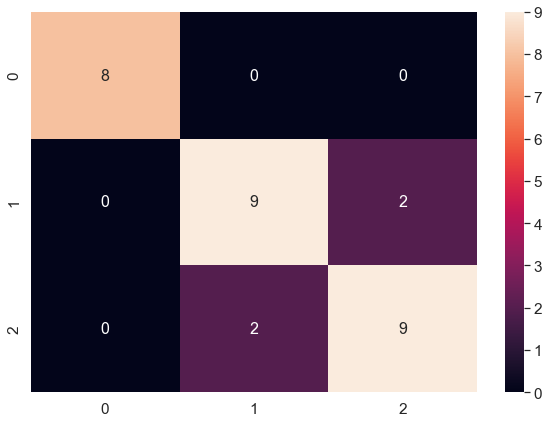

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.82      0.82        11
           2       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



In [21]:
# import OneVsRestClassifier
from sklearn.multiclass import OneVsRestClassifier
## define the ovr strategy
#model = OneVsRestClassifier(LogisticRegression())
## specify the solver for logistic regression
model = OneVsRestClassifier(LogisticRegression(solver='newton-cg',random_state=5))
## fit model
model.fit(X_train, y_train)
print('Logistic Regression Model Coeff (m) =' , model.estimators_[0].coef_)
print('Logistic Regression Model Coeff (m) =' , model.estimators_[1].coef_)
print('Logistic Regression Model Coeff (m) =' , model.estimators_[2].coef_)

print('\nLogistic Regression Model Coeff (m) =' , model.estimators_[0].intercept_)
print('Logistic Regression Model Coeff (m) =' , model.estimators_[1].intercept_)
print('Logistic Regression Model Coeff (m) =' , model.estimators_[2].intercept_)

#print('Logistic Regression Model Coeff (b) =' , model.intercept_)
y_pred=model.predict(X_test)
print(y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
#print("\nPrediction Probability : \n",model.predict_proba(X_test))
print("\nPrediction : ",model.predict(X_test))
print("\nScore : ",model.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix : \n",confusion_matrix(y_test, model.predict(X_test)))
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, model.predict(X_test))
df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

[1 2 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]
0.9333333333333333

Prediction :  [1 2 2 0 2 1 0 2 0 1 1 1 2 2 0 0 2 2 0 0 1 2 0 1 1 2 1 1 1 2]

Score :  0.9333333333333333

Confusion Matrix : 
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


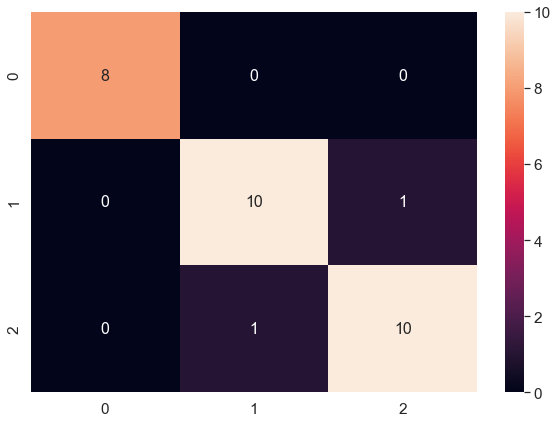

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      0.91      0.91        11
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [22]:
#Import KNN Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
Model_knn=KNeighborsClassifier(n_neighbors=5)
Model_knn.fit(X_train, y_train)
y_pred=Model_knn.predict(X_test)
print(y_pred)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
#print("\nPrediction Probability : \n",model.predict_proba(X_test))
print("\nPrediction : ",Model_knn.predict(X_test))
print("\nScore : ",Model_knn.score(X_test, y_test))
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix : \n",confusion_matrix(y_test, Model_knn.predict(X_test)))
import seaborn as sn
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, Model_knn.predict(X_test))
df_cm = pd.DataFrame(cm, range(3), range(3))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()
from sklearn.metrics import classification_report
print(classification_report(y_test, Model_knn.predict(X_test)))